<a href="https://colab.research.google.com/github/Mosquera8/deep-learning/blob/main/DeepLeves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepLeaves 🌿
Desarrollo de Modelo para aplicación DeepLeaves con 70% `accuracy` o superior.
Se tiene encuenta `precision` & `recall`
Dentro del proyecto se necesita: 
> Pandas | Numpy |TensorFlow-keras | Matplotlib | cv2 (manipula imagenes)



# Imagenes Drive 🚘
Manejo de imagenes por medio del drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="drive/MyDrive/Proyecto/"
pathModel="drive/MyDrive/Proyecto/Data/Model"

#Data manipulation imports

In [ ]:
# importe manipulacion

import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Deep learning 
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image,image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow import keras
import tensorflow

Me dice si tengo una gpu configurada para poder manejar datos con tensorflow

In [ ]:
print("Num GPUs Available:",len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available: 0


Truco de ingeniero de datos para tener una misma semilla randomica

In [ ]:
# Colocar un valor fijo de seed para poder reproducir experimetos en ese campo. 
seed = 1998
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Quita los warnings
warnings.simplefilter('ignore')

# Cargar los datos 📄

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# define image dataset
# de 0 a 255 para colore rgb, nustra data va a tener 80% train y 20% validation
image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2) # shear_range=.25, zoom_range=.2, horizontal flip

# separa la data en Train&Validation, cada uno por bloques de 36
train_dataset = image_generator.flow_from_directory(batch_size=36,
                                                 directory=path+'Data/Train',
                                                 shuffle=True,
                                                 target_size=(224,224),
                                                 subset="training",
                                                 class_mode='categorical')
# el 20% aquí
validation_dataset = image_generator.flow_from_directory(batch_size=36,
                                                 directory=path+'Data/Train',
                                                 shuffle=True,
                                                 target_size=(224,224),
                                                 subset="validation",
                                                 class_mode='categorical')
# Organizar data para predicciones test
#image_generator_test = ImageDataGenerator(rescale=1/255)
#test = image_generator_test.flow_from_directory(
#                                                directory='data/Predice',
#                                               shuffle = False,
#                                                 target_size=(224,224),
#                                                class_mode=None)

Found 4451 images belonging to 5 classes.
Found 1108 images belonging to 5 classes.


# Mirar los datos del primer batch

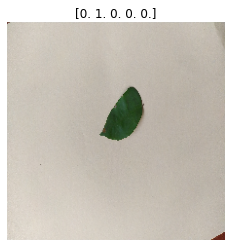

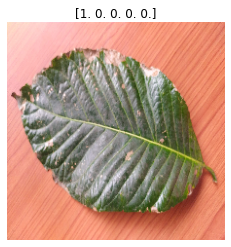

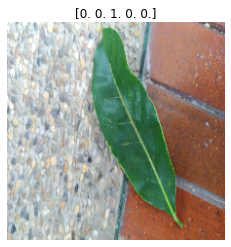

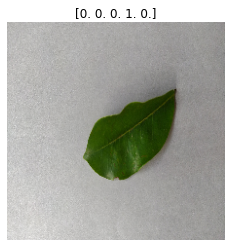

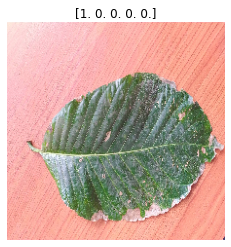

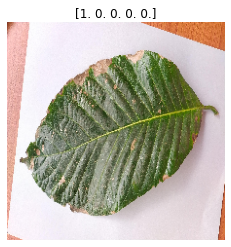

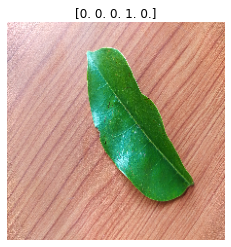

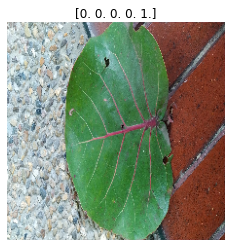

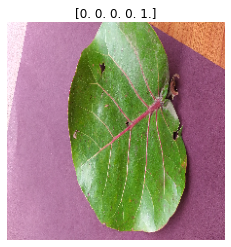

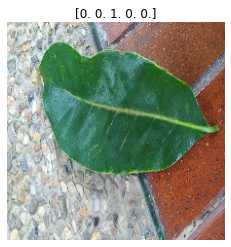

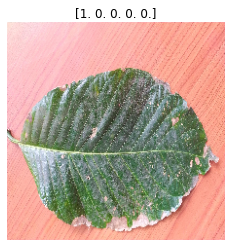

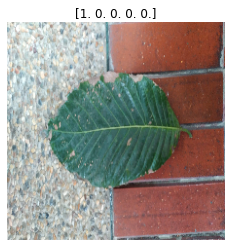

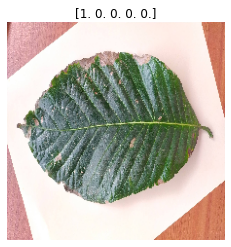

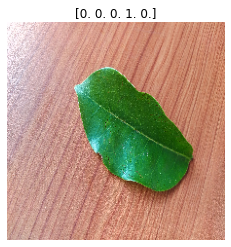

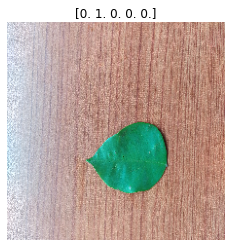

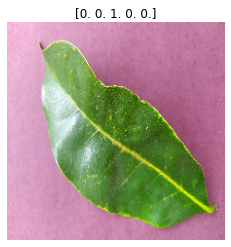

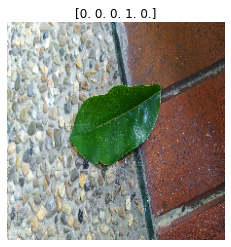

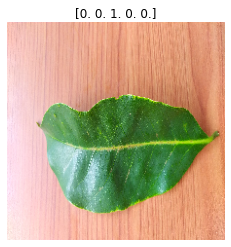

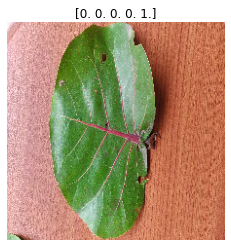

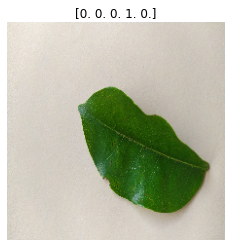

In [ ]:
batch_uno_img = train_dataset[0]
for i in range(0,36):
  img = batch_uno_img[0][i]
  lab = batch_uno_img[1][i]
  plt.imshow(img)
  plt.title(lab)
  plt.axis('off')
  plt.show()

# Crear un ANN (Artificial neural network) ✅

In [ ]:
# Un ann con solo 3 capas
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [224,224,3]),
keras.layers.Dense(300,activation='relu'),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(5 ,activation='softmax')])

In [ ]:
from tensorflow.python import metrics
from tensorflow._api.v2.config import optimizer

model.compile(loss = tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                         patience = 3,
                                         restore_best_weights = True)

In [ ]:
model.fit(train_dataset, epochs = 20, validation_data = validation_dataset , callbacks = callback)

Epoch 1/20
20/20 [==============================] - 66s 3s/step - loss: 14.6367 - accuracy: 0.3325 - val_loss: 4.7076 - val_accuracy: 0.2700
Epoch 2/20
20/20 [==============================] - 61s 3s/step - loss: 0.8015 - accuracy: 0.7875 - val_loss: 1.6284 - val_accuracy: 0.5300
Epoch 3/20
20/20 [==============================] - 62s 3s/step - loss: 0.5125 - accuracy: 0.8825 - val_loss: 0.6401 - val_accuracy: 0.7300
Epoch 4/20
20/20 [==============================] - 61s 3s/step - loss: 0.0501 - accuracy: 0.9825 - val_loss: 0.2507 - val_accuracy: 0.8700
Epoch 5/20
20/20 [==============================] - 63s 3s/step - loss: 0.0478 - accuracy: 0.9925 - val_loss: 0.2975 - val_accuracy: 0.9100
Epoch 6/20
20/20 [==============================] - 61s 3s/step - loss: 0.0541 - accuracy: 0.9750 - val_loss: 0.1657 - val_accuracy: 0.9200
Epoch 7/20
20/20 [==============================] - 64s 3s/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.2199 - val_accuracy: 0.9300
Epoch 8/20
20/20 [=

# CNN 🎡
Convolutional Neural Net

In [ ]:
modelc = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=[224,224,3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(5,activation='softmax'),
])

In [ ]:
modelc.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy']) # ['precision','recall']
callback = keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                         patience = 3,
                                         restore_best_weights = True)

In [ ]:

modelc.fit(train_dataset, epochs = 18, validation_data = validation_dataset , callbacks = callback)

Epoch 1/18
124/124 [==============================] - 5112s 41s/step - loss: 1.0331 - accuracy: 0.7605 - val_loss: 1.0804 - val_accuracy: 0.7726
Epoch 2/18
124/124 [==============================] - 1493s 12s/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.8168 - val_accuracy: 0.7310
Epoch 3/18
124/124 [==============================] - 1487s 12s/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 1.1734 - val_accuracy: 0.7148
Epoch 4/18
124/124 [==============================] - 1512s 12s/step - loss: 0.0679 - accuracy: 0.9802 - val_loss: 1.2844 - val_accuracy: 0.7473
Epoch 5/18
124/124 [==============================] - 1520s 12s/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 2.4640 - val_accuracy: 0.7112


# Crear un Modelo con Keras Tuner 🧪

In [ ]:
# Extraer por batches. Imagenes y labels informacion que pide el keras tuner en formato np
train_img= []
train_labels= []

for i in range(len(train_dataset)):
  batch= train_dataset[i]
  for j in range(len(batch[0])):
    train_img.append(batch[0][j])
    train_labels.append(batch[1][j])

validation_img= []
validation_labels= []

for i in range(len(validation_dataset)):
  batch= validation_dataset[i]
  for j in range(len(batch[0])):
    validation_img.append(batch[0][j])
    validation_labels.append(batch[1][j])

train_img = np.array(train_img)
train_labels = np.array(train_labels)
validation_img = np.array(validation_img)
validation_labels = np.array(validation_labels)

In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential([data_augmentation])
    model.add(keras.layers.AveragePooling2D(4,2)) #Reduce el esfuerzo que tiene que hacer para recorrer la imagen
    
    for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
        model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
        model.add(keras.layers.MaxPool2D((3,3)))

    #model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256]), activation='relu'))

    model.add(keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=32,
)

tuner.search(train_img, train_labels, validation_data=(validation_img, validation_labels), epochs=20)

In [ ]:
# Mejor modelo
tuner_model = tuner.get_best_models()[0]

# Espacio para aumentar data ↕
Independiente del modelo se puede mejorar con más variedad en la data que maneja

In [ ]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomContrast(0.1)
])

In [ ]:
#Se le agrega a a los modelos que pasen aquí para llevar una organización
model_a = keras.Sequential([data_augmentation,modelc]) #en model se coloca el modelo con el que se trabaja

model_a.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics=['accuracy']) # ['precision','recall']
              
callback = keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                         patience = 3,
                                         restore_best_weights = True)

In [ ]:
# fiteo 
history=model_a.fit(train_dataset, epochs = 18, validation_data = validation_dataset , callbacks = callback)

Epoch 1/18
124/124 [==============================] - 1578s 13s/step - loss: 0.1288 - accuracy: 0.9578 - val_loss: 1.7331 - val_accuracy: 0.6318
Epoch 2/18
124/124 [==============================] - 1528s 12s/step - loss: 0.0915 - accuracy: 0.9679 - val_loss: 2.2647 - val_accuracy: 0.7193
Epoch 3/18
124/124 [==============================] - 1534s 12s/step - loss: 0.0695 - accuracy: 0.9764 - val_loss: 3.8416 - val_accuracy: 0.5884
Epoch 4/18
124/124 [==============================] - 1541s 12s/step - loss: 0.0545 - accuracy: 0.9814 - val_loss: 2.5978 - val_accuracy: 0.7310


# Espacio para validar 👁‍🗨

In [ ]:
# Si el modelo esta guardado
modelo_guardado = load_model(pathModel+'/modelo_plantas_cnn.h5')

In [ ]:
# Loos & acucuracy 
loss, accuracy = model_a.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ",accuracy)

31/31 [==============================] - 265s 9s/step - loss: 1.1973 - accuracy: 0.7762
Loss:  1.197283148765564
Accuracy:  0.7761732935905457


In [ ]:
# Summary
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 5)                 86587325  
                                                                 
Total params: 86,587,325
Trainable params: 86,587,325
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Los pesos
modelo_guardado.get_weights()

In [ ]:
# Esto solo sirve para hacer test con imagenes en alguna carpeta definida, recordar siempre reescalar las imagenes
modelo_guardado.predict(test)

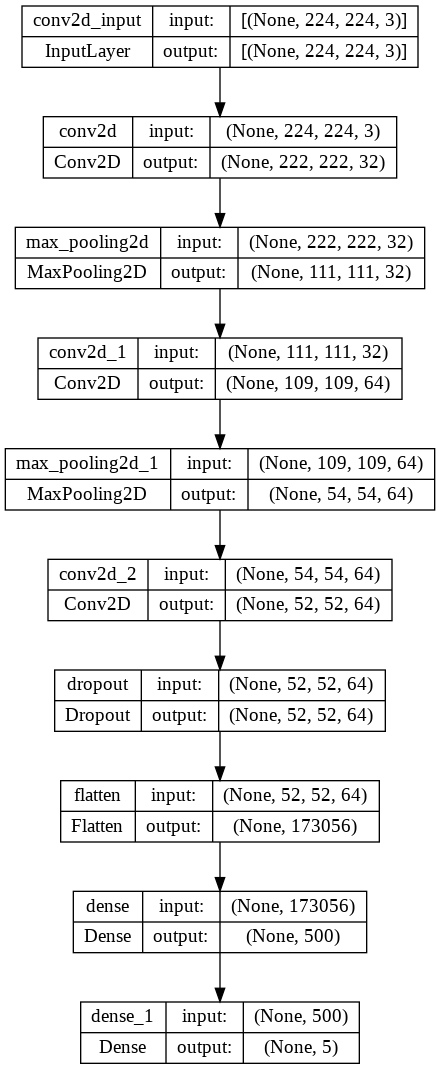

In [ ]:
#visualizer / !pip3 install keras-visualizer
from keras.utils.vis_utils import plot_model

plot_model(modelc, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

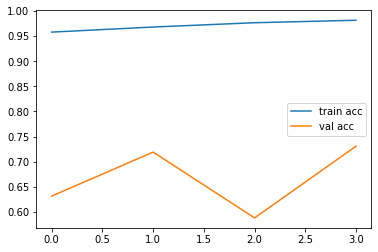

In [ ]:
# accuracies, guardar fit en una variable history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
#plt.savefig('grafico-acc.png')
plt.show()

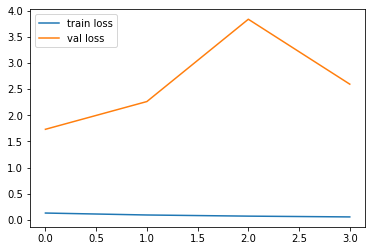

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
#plt.savefig('grafico-loss.png')
plt.show()

# Trucos para no tener problemas 🐞

In [ ]:
#clear session
tensorflow.keras.backend.clear_session()

In [ ]:
#Problemas con corrupcion/ identifica donde
from PIL import Image
folder_path = r'data/Train/'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

# Front Streamlit 🈺
Los pasos para ejecutar esto es:
1. Guardar el modelo
2. Instalar librerias de streamlit y ngrok
3. Proceso del servidor y ejecutar todo eso
4. Ya con la pag funcionando se puede usar el archivo

# Guardado del modelo 🎋

## Safe from Keras

In [ ]:
!mkdir modelP

In [ ]:
if os.path.isfile('modelP/modelo_plantas_cnn_total_a.h5') is False:
  model_a.save('modelP/modelo_plantas_cnn_total_a.h5')

## Instalar librerias para el host de la app

In [ ]:
!pip install pyngrok
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 35.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=4457d09eda339fab040a2f035c4cb244a0a72cbce341c23f101f278daac06d9f
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 6.6 MB/s 
     |████████████████████████████████| 235 kB 66.6 MB/s 
     |████████████████████████████████| 4.7 MB 49.5 MB/s 
     |████████████████████████████████| 181 kB 75.7 MB/s 
     |████████████████████████████████| 164 kB 61.1 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
 

## Archivo para el manejo del front
Cambiar el nombre del archivo 🛑

In [ ]:

%%writefile appDeepLeaves.py 

import streamlit as st
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
from tensorflow import keras
import tensorflow


st.title("Deepleaves web app")
st.text("Cargar una imagen")

# lee el modelo con imagenes [*]
modeloCargado = load_model('data/modelo_plantas_uno.h5')

# carga los archivos del usuario tipo jpg
cargar_archivo = st.file_uploader("Seleccionar una imagen",type="jpg")

# Muestra la alerta con la imagen cargada por el usuario
if cargar_archivo is not None:
  img = Image.open(cargar_archivo)
  st.image(img,caption='Imagen cargada')

# Boton para predecir la imagen seleccionada 
if st.button('Predecir imagen'):
    CATEGORIAS =['Borojo','Carambolo','Guanabano','NaranjoComun','UvaDePlaya']
    data_plana = []
    imagen = np.array(img)
    img_resized = np.resize(img,(224,224,3))
    data_plana.append(img_resized.flatten())
    data_plana = np.array(data_plana)
    #print(imagen.shape)
    plt.imshow(img_resized)
    y_out = modeloCargado.predict(data_plana)
    y_out = CATEGORIAS[y_out[0]]
    st.write(f'Prediccion: {y_out}')

  ## funcion para predecir
  def funcionPredict(imagen_data,modelo):
  size= (224,224)
  imagen = ImageOps.fit(imagen_data,size)
  img = np.asarray(imagen) # toma la imagen como un arreglo con el (np.asarray)

  # le agrega la segunda dimension del arreglo para poder leer la imagen ya que el modelo
  # espera un arreglo de dos dimensiones
  img_reshape = img[np.newaxis,...] 

  prediccion = modelo.predict(img_reshape)
  #print(imagen) muestra los parametros de la imagen 
  
  return prediccion

  ## info imagenes
  def infoImagen(nombre):

  #Boton que va a llevar un link
  urlUva = "https://es.wikipedia.org/wiki/Coccoloba_uvifera"
  btnLink = st.button('Web browser')

  if nombre == "Borojo":
    mensaje = st.write("Soy borojo")

  elif nombre == "Carambolo":
   mensaje = st.write("Soy Carambolo")
  elif nombre == "Guanabano":
   mensaje = st.write("Soy guanabano")
  elif nombre == "NaranjoComun":
   mensaje = st.write("Soy Naranjo")
  elif nombre == "UvaDePlaya":
   mensaje = st.write("Soy Uva")
   if btnLink:
      webbrowser.open_new_tab(urlUva)
      
  else:
    mensaje = st.write("Error") 
   
  return mensaje

  ### funcion sidebar con la prediccion
  def predictSideBar():
  cargar_archivo = st.file_uploader("Selecciona una imagen",type=["jpg","png"])

  if cargar_archivo is not None:
    imagenCargada = Image.open(cargar_archivo)
    st.image(imagenCargada,caption='Imagen cargada')
  
  btn = st.button('Predecir imagen ')
  if btn:
    prediccionP = funcionPredict(imagenCargada,modelo)
    categorias = ['Borojo','Carambolo','Guanabano','NaranjoComun','UvaDePlaya']
    mensaje = "Prediccion: "+categorias[np.argmax(prediccionP)]
    st.title(mensaje)
    nombre = categorias[np.argmax(prediccionP)]
    infoImagen(nombre)


Writing appDeepLeaves.py


#Proceso para el servidor local
Se tiene que ejecutar primero estos pasos antes para iniciar el programa web

In [ ]:
from pyngrok import ngrok

In [ ]:
# OJO se va a seguir utilizando mi token? o se hace con tu cuenta?
# token de autenticacion
ngrok.set_auth_token("2F012e6YHGkcVU1p4mcPrVjXgFI_4xThD2Xx7ma8JZn7Rv9P7")

In [ ]:
# OJO puede que tengas otro puerto asignado, asi que puede que no sea el 80
# correr la app en el puerto asignado
!nohup streamlit run appDeepLeaves.py --server.port 80 &
url =ngrok.connect(port ='80')
print(url)

nohup: appending output to 'nohup.out'
NgrokTunnel: "http://a6fb-35-187-237-173.ngrok.io" -> "http://localhost:80"


In [ ]:
# Esto solo se hace para saber si hay tuneles activos y cuales son
from pyngrok import ngrok

tunnels = ngrok.get_tunnels()
tunnels

[<NgrokTunnel: "https://a6fb-35-187-237-173.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "http://a6fb-35-187-237-173.ngrok.io" -> "http://localhost:80">]

In [ ]:
# Comando para acabar con todos los tuneles activos en caso de errores
!killall ngrok